In [1]:
import pandas as pd

In [5]:
# Since the data from kaggle is already flat, load them directly into dataframes
file_dir = 'C://Users/16153/Documents/Bootcamp Notes/ClassNotes/08_Notes/'
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [6]:
# Review the data head(), tail(), sample()
# kaggle_metadata.head()
# kaggle_metadata.tail()
kaggle_metadata.sample(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
23587,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,51976,tt1588358,es,Hermano,Two brothers fight to escape a violent and poo...,...,2010-07-02,0.0,97.0,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,On this pitch... Life is on the line,Brother,False,6.5,10.0
31680,False,"{'id': 353325, 'name': 'Joe Dirt Collection', ...",0,"[{'id': 35, 'name': 'Comedy'}]",http://www.crackle.com/c/joe-dirt-2-beautiful-...,335970,tt4126340,en,Joe Dirt 2: Beautiful Loser,When happy family man Joe Dirt finds himself t...,...,2015-07-16,0.0,107.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Go Hick Yourself,Joe Dirt 2: Beautiful Loser,False,4.3,45.0
17750,False,NaN,60000000,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",http://contagionmovie.warnerbros.com/,39538,tt1598778,en,Contagion,As an epidemic of a lethal airborne virus - th...,...,2011-09-08,137551594.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing spreads like fear,Contagion,False,6.2,1351.0


In [7]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [10]:
# Before we convert the "adult" and "video" columns, we want to check that all the values are either True or False.
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [11]:
# To remove the bad data, use the following:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# The following code will keep rows where the adult column is False, and then drop the adult column.
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [13]:
# Next, we'll look at the values of the video column:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [14]:
# To convert, use the following code:
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [15]:
# The above code creates the Boolean column we want. We just need to assign it back to video:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [17]:
# For the numeric columns, we can just use the to_numeric() method from Pandas. 
# We'll make sure the errors= argument is set to 'raise', so we'll know if there's 
# any data that can't be converted to numbers.
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [18]:
# Finally, we need to convert release_date to datetime. Luckily, Pandas has a built-in function
# for that as well: to_datetime().
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [19]:
# Reviewing the Ratings Data
# We'll use the info() method on the DataFrame. Since the ratings dataset has so many rows, we need 
# to set the null_counts option to True.
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [20]:
# We'll specify in to_datetime() that the origin is 'unix' and the time unit is seconds.
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [21]:
# These dates don't seem outlandish—the years are within expected bounds, and there 
# appears to be some consistency from one entry to the next. Since the output looks 
# reasonable, assign it to the timestamp column.
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

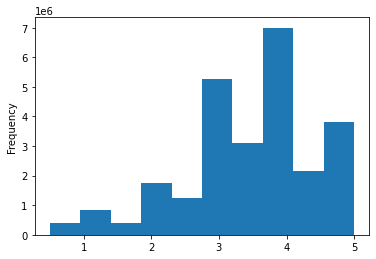

In [22]:
# Finally, we'll look at the statistics of the actual ratings and see if there are 
# any glaring errors. A quick, easy way to do this is to look at a histogram of the 
# rating distributions, and then use the describe() method to print out some stats 
# on central tendency and spread.
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()